Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

Read Data

In [2]:
df_train = pd.read_csv("1991_stats.csv", delimiter=",")
df_train[0:5]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
0,1,Chris Mullin*\mullich01,SF,27,GSW,82,82,40.4,9.5,17.7,...,1.7,3.7,5.4,4.0,2.1,0.8,3.0,2.1,25.7,1
1,2,Karl Malone*\malonka01,PF,27,UTA,82,82,40.3,10.3,19.6,...,2.9,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,1
2,3,Mitch Richmond*\richmmi01,SG,25,GSW,77,77,39.3,9.1,18.5,...,1.9,4.0,5.9,3.1,1.6,0.4,3.0,2.7,23.9,0
3,4,Tim Hardaway\hardati01,PG,24,GSW,82,82,39.2,9.0,18.9,...,1.1,3.0,4.0,9.7,2.6,0.1,3.3,2.8,22.9,0
4,5,Tyrone Corbin\corbity01,SF,28,MIN,82,82,39.0,7.2,16.0,...,2.3,4.9,7.2,4.2,2.0,0.6,2.5,3.1,18.0,0


In [3]:
df_train.corr(method='pearson')

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
Rk,1.000000,0.115440,0.112116,-0.618248,-0.995274,-0.748877,-0.732434,-0.097103,-0.249520,-0.250741,...,-0.121143,-0.332095,-0.276259,-0.423807,-0.424965,-0.098336,-0.608142,-0.025661,-0.744713,-0.439566
Age,0.115440,1.000000,0.045440,-0.047667,-0.110152,-0.070554,-0.094194,0.136136,-0.017919,-0.021333,...,-0.007465,0.083407,0.055222,-0.121888,-0.321595,-0.022432,-0.221803,-0.192192,-0.080930,0.053333
G,0.112116,0.045440,1.000000,0.105405,-0.119521,-0.149728,-0.185465,0.141798,-0.005502,-0.031988,...,-0.011052,-0.103548,-0.078265,-0.100086,-0.081683,-0.127519,-0.306427,-0.117778,-0.135137,-0.022783
GS,-0.618248,-0.047667,0.105405,1.000000,0.632780,0.351663,0.313537,0.223211,0.152284,0.139907,...,0.061263,0.232234,0.185376,0.255801,0.270293,0.023920,0.310307,0.121674,0.315027,0.211444
MP,-0.995274,-0.110152,-0.119521,0.632780,1.000000,0.741432,0.722986,0.103296,0.247029,0.247457,...,0.126470,0.339094,0.283215,0.415100,0.419348,0.092330,0.603989,0.035553,0.735015,0.417215
FG,-0.748877,-0.070554,-0.149728,0.351663,0.741432,1.000000,0.968848,0.116819,0.272029,0.280295,...,0.031765,0.176797,0.135586,0.275370,0.365753,0.118276,0.616542,-0.061870,0.974316,0.545196
FGA,-0.732434,-0.094194,-0.185465,0.313537,0.722986,0.968848,1.000000,-0.113542,0.368713,0.390130,...,-0.053332,0.094153,0.047789,0.317308,0.394417,0.048086,0.624969,-0.093431,0.950775,0.478040
FG%,-0.097103,0.136136,0.141798,0.223211,0.103296,0.116819,-0.113542,1.000000,-0.306145,-0.353614,...,0.339428,0.338707,0.355864,-0.174074,-0.147871,0.298800,-0.037672,0.135201,0.091568,0.192688
3P,-0.249520,-0.017919,-0.005502,0.152284,0.247029,0.272029,0.368713,-0.306145,1.000000,0.985510,...,-0.421151,-0.276436,-0.341310,0.434467,0.376763,-0.318748,0.217893,-0.312350,0.360780,0.053259
3PA,-0.250741,-0.021333,-0.031988,0.139907,0.247457,0.280295,0.390130,-0.353614,0.985510,1.000000,...,-0.408522,-0.281299,-0.340106,0.447965,0.386496,-0.318206,0.236541,-0.321714,0.370152,0.083599


In [4]:
df_test = pd.read_csv("1992_stats.csv", delimiter=",")
df_test[0:5]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
0,1,Chris Mullin*\mullich01,SF,28,GSW,81,81,41.3,10.2,19.6,...,1.6,4.0,5.6,3.5,2.1,0.8,2.5,2.1,25.6,1
1,2,Tim Hardaway\hardati01,PG,25,GSW,81,81,41.1,9.1,19.7,...,1.0,2.8,3.8,10.0,2.0,0.2,3.3,2.6,23.4,1
2,3,Dennis Rodman*\rodmade01,PF,30,DET,82,80,40.3,4.2,7.7,...,6.4,12.3,18.7,2.3,0.8,0.9,1.7,3.0,9.8,1
3,4,James Worthy*\worthja01,SF,30,LAL,54,54,39.0,8.3,18.6,...,1.8,3.8,5.6,4.7,1.4,0.4,2.4,1.6,19.9,0
4,5,Joe Dumars*\dumarjo01,SG,28,DET,82,82,38.9,7.2,16.0,...,1.0,1.3,2.3,4.6,0.9,0.1,2.4,1.8,19.9,0


Pre-processing

In [5]:
df_train = df_train.drop(labels=['Rk','Player','Tm','Age','G','GS','FG%','3P','3PA','3P%','FT%','ORB','PF'],axis=1)
df_train = df_train.fillna(0)
df_train[0:5]

,Pos,MP,FG,FGA,2P,2PA,2P%,eFG%,FT,FTA,DRB,TRB,AST,STL,BLK,TOV,PTS,isAllNBA
0,SF,40.4,9.5,17.7,9.0,16.0,0.560,0.550,6.3,7.1,3.7,5.4,4.0,2.1,0.8,3.0,25.7,1
1,PF,40.3,10.3,19.6,10.3,19.4,0.529,0.528,8.3,10.8,8.9,11.8,3.3,1.1,1.0,3.0,29.0,1
2,SG,39.3,9.1,18.5,8.6,17.0,0.506,0.508,5.1,6.0,4.0,5.9,3.1,1.6,0.4,3.0,23.9,0
3,PG,39.2,9.0,18.9,7.8,15.8,0.494,0.508,3.7,4.6,3.0,4.0,9.7,2.6,0.1,3.3,22.9,0
4,SF,39.0,7.2,16.0,7.1,15.9,0.450,0.449,3.6,4.5,4.9,7.2,4.2,2.0,0.6,2.5,18.0,0


In [6]:
df_test = df_test.drop(labels=['Rk','Player','Tm','Age','G','GS','FG%','3P','3PA','3P%','FT%','ORB','PF'],axis=1)
df_test = df_test.fillna(0)
df_test[0:5]

,Pos,MP,FG,FGA,2P,2PA,2P%,eFG%,FT,FTA,DRB,TRB,AST,STL,BLK,TOV,PTS,isAllNBA
0,SF,41.3,10.2,19.6,9.5,17.4,0.544,0.544,4.3,5.2,4.0,5.6,3.5,2.1,0.8,2.5,25.6,1
1,PG,41.1,9.1,19.7,7.5,15.0,0.499,0.501,3.7,4.8,2.8,3.8,10.0,2.0,0.2,3.3,23.4,1
2,PF,40.3,4.2,7.7,3.8,6.5,0.581,0.564,1.0,1.7,12.3,18.7,2.3,0.8,0.9,1.7,9.8,1
3,SF,39.0,8.3,18.6,8.2,17.9,0.457,0.451,3.1,3.8,3.8,5.6,4.7,1.4,0.4,2.4,19.9,0
4,SG,38.9,7.2,16.0,6.6,14.5,0.452,0.466,5.0,5.8,1.3,2.3,4.6,0.9,0.1,2.4,19.9,0


In [7]:
X_train = df_train[['Pos', 'MP', 'FG', 'FGA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']].values
le_pos = preprocessing.LabelEncoder()
le_pos.fit(['PG','SG','SF','PF','C'])
X_train[:,0] = le_pos.transform(X_train[:,0])
X_train[0:5]

array([[3, 40.4, 9.5, 17.7, 9.0, 16.0, 0.56, 0.55, 6.3, 7.1, 3.7, 5.4,
        4.0, 2.1, 0.8, 3.0, 25.7],
       [1, 40.3, 10.3, 19.6, 10.3, 19.4, 0.529, 0.528, 8.3, 10.8, 8.9,
        11.8, 3.3, 1.1, 1.0, 3.0, 29.0],
       [4, 39.3, 9.1, 18.5, 8.6, 17.0, 0.506, 0.508, 5.1, 6.0, 4.0, 5.9,
        3.1, 1.6, 0.4, 3.0, 23.9],
       [2, 39.2, 9.0, 18.9, 7.8, 15.8, 0.494, 0.508, 3.7, 4.6, 3.0, 4.0,
        9.7, 2.6, 0.1, 3.3, 22.9],
       [3, 39.0, 7.2, 16.0, 7.1, 15.9, 0.45, 0.449, 3.6, 4.5, 4.9, 7.2,
        4.2, 2.0, 0.6, 2.5, 18.0]], dtype=object)

In [8]:
y_train = df_train["isAllNBA"]
y_train [0:5]

0    1
1    1
2    0
3    0
4    0
Name: isAllNBA, dtype: int64

In [9]:
X_test = df_test[['Pos', 'MP', 'FG', 'FGA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']].values
le_pos2 = preprocessing.LabelEncoder()
le_pos2.fit(['PG','SG','SF','PF','C'])
X_test[:,0] = le_pos2.transform(X_test[:,0])
X_test[0:5]

array([[3, 41.3, 10.2, 19.6, 9.5, 17.4, 0.544, 0.544, 4.3, 5.2, 4.0, 5.6,
        3.5, 2.1, 0.8, 2.5, 25.6],
       [2, 41.1, 9.1, 19.7, 7.5, 15.0, 0.499, 0.501, 3.7, 4.8, 2.8, 3.8,
        10.0, 2.0, 0.2, 3.3, 23.4],
       [1, 40.3, 4.2, 7.7, 3.8, 6.5, 0.581, 0.564, 1.0, 1.7, 12.3, 18.7,
        2.3, 0.8, 0.9, 1.7, 9.8],
       [3, 39.0, 8.3, 18.6, 8.2, 17.9, 0.457, 0.451, 3.1, 3.8, 3.8, 5.6,
        4.7, 1.4, 0.4, 2.4, 19.9],
       [4, 38.9, 7.2, 16.0, 6.6, 14.5, 0.452, 0.466, 5.0, 5.8, 1.3, 2.3,
        4.6, 0.9, 0.1, 2.4, 19.9]], dtype=object)

In [10]:
y_test = df_test["isAllNBA"]
y_test [0:5]

0    1
1    1
2    1
3    0
4    0
Name: isAllNBA, dtype: int64

In [11]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X_train, y_train)

Modeling

In [12]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state = 42)
decTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [13]:
decTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Prediction

In [14]:
predTree = decTree.predict(X_test)

Evaluation

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9466666666666667


In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='weighted') 

0.9429533969679956

In [17]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predTree,pos_label=0)

0.9432624113475178

Visualization

In [18]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

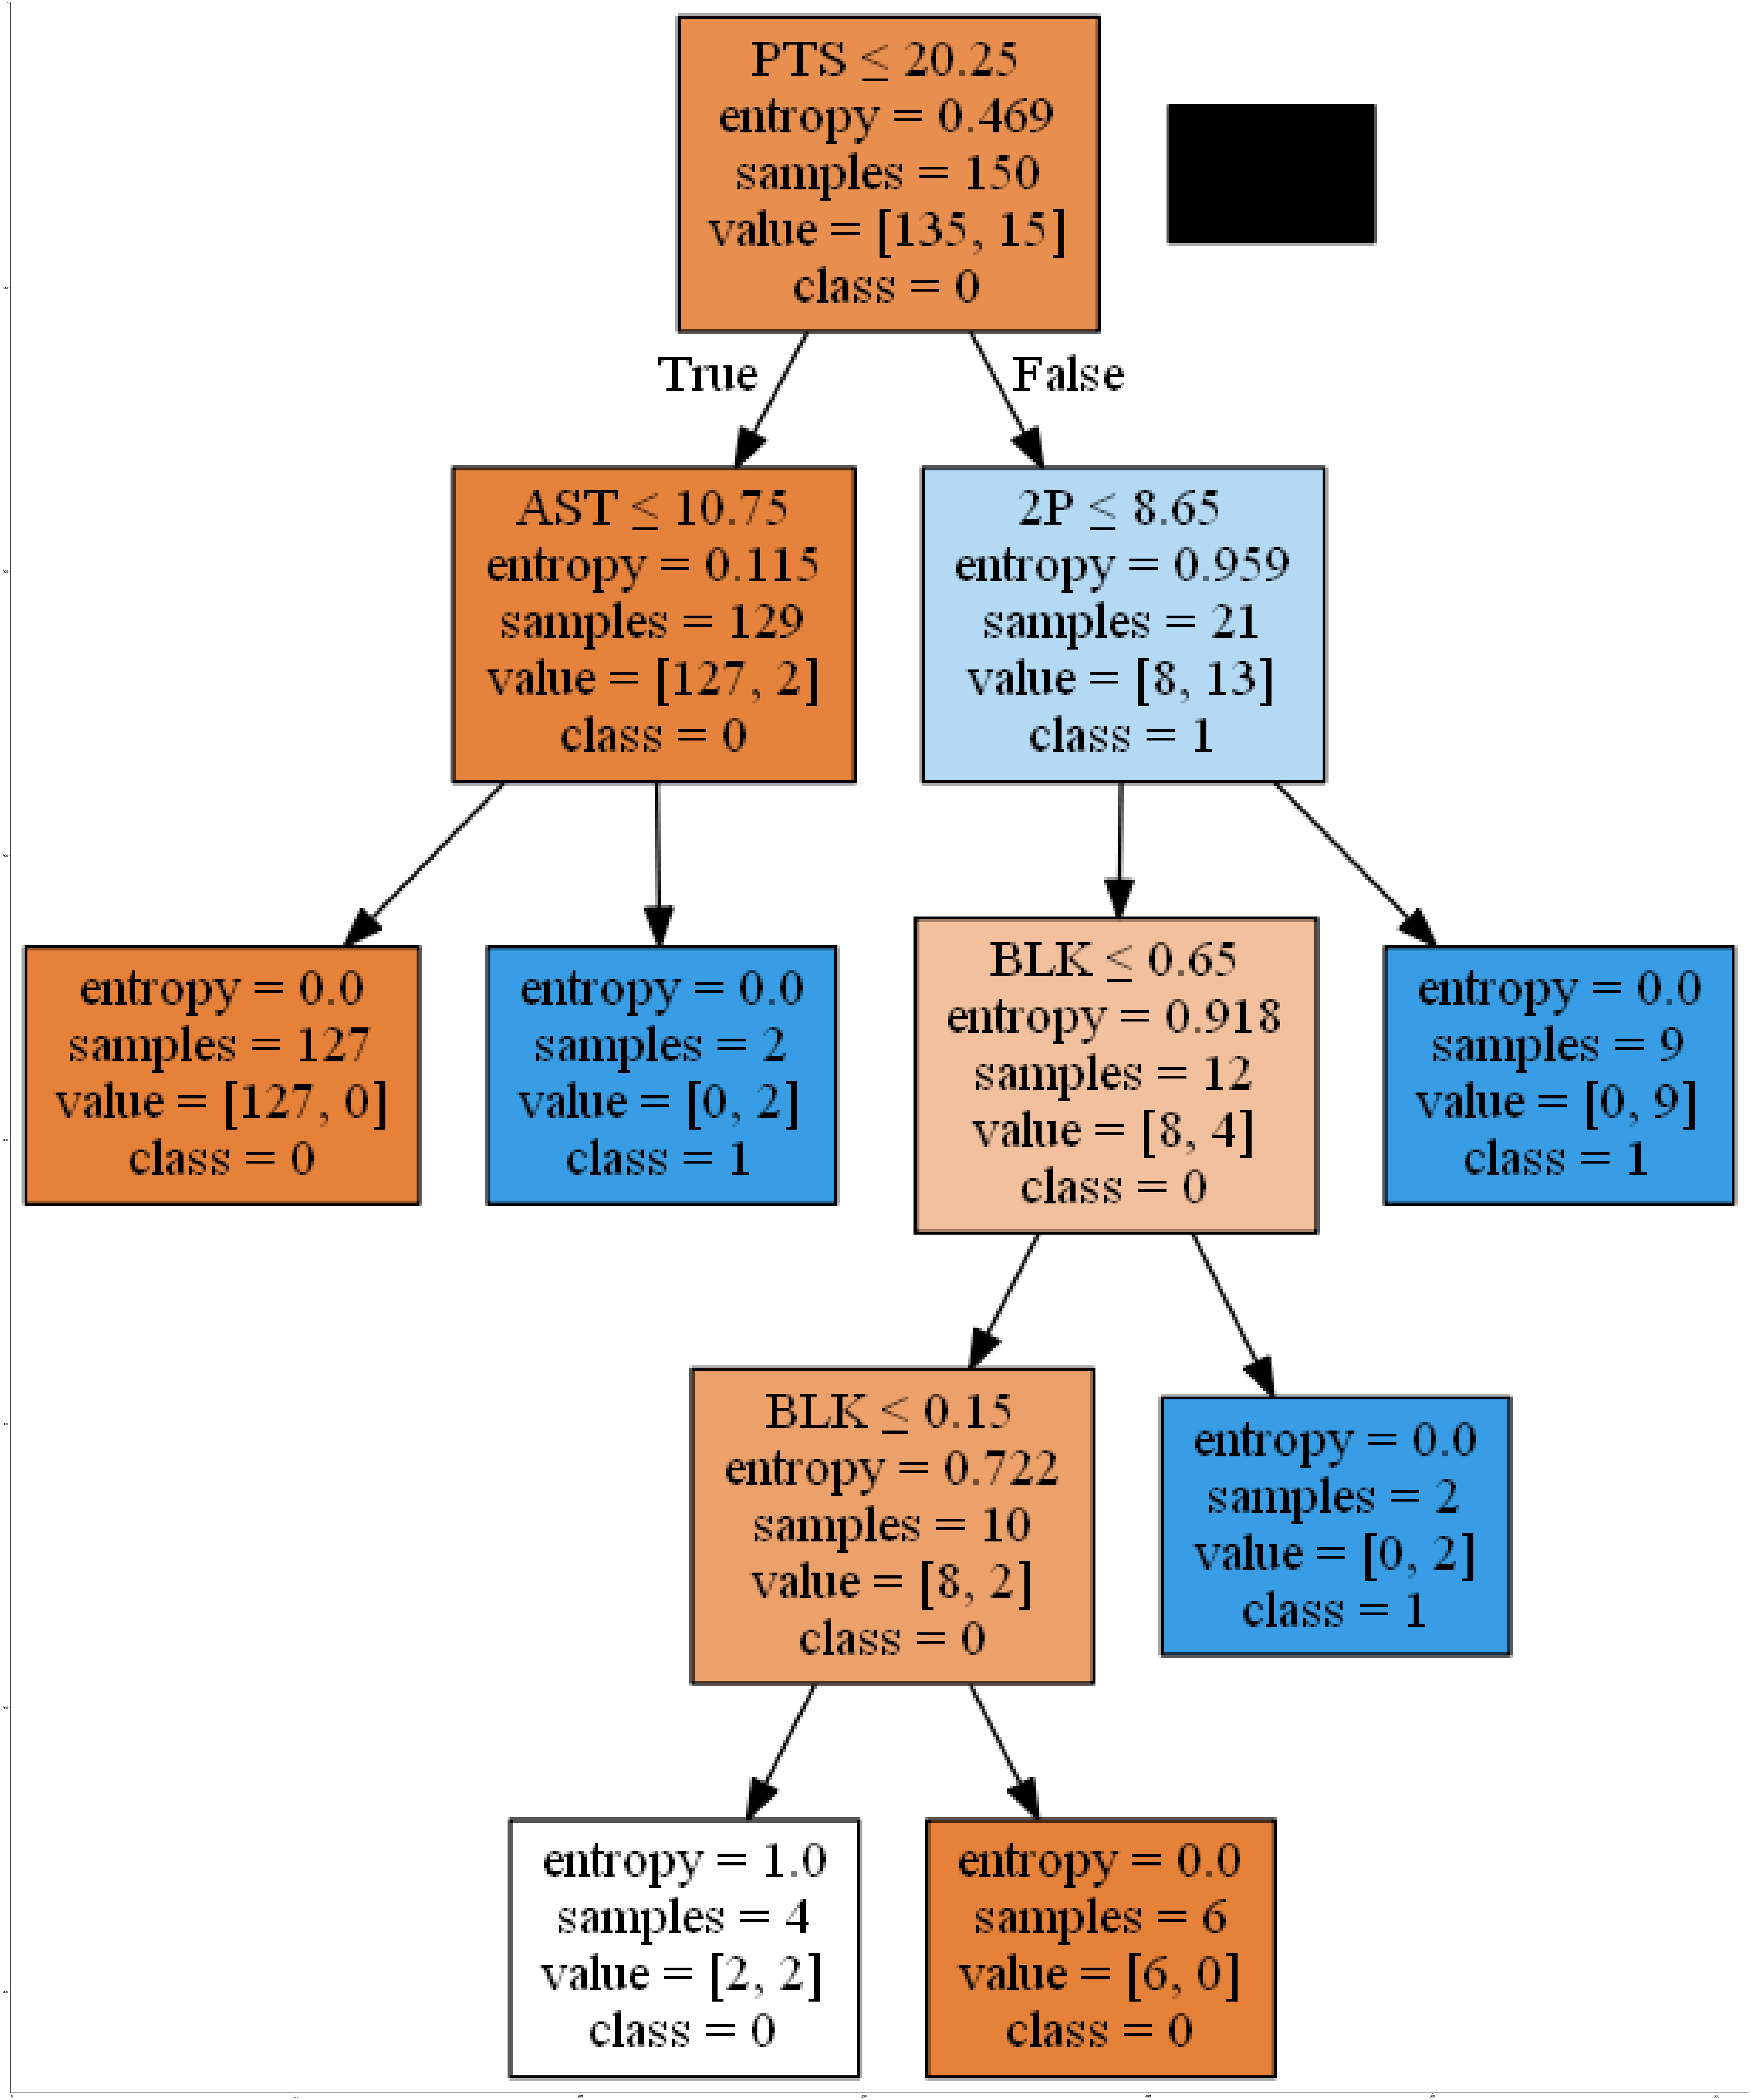

In [19]:
dot_data = StringIO()
filename = "dectree.png"
featureNames = df_test.columns[0:17]
out=tree.export_graphviz(decTree,feature_names=featureNames, out_file=dot_data, class_names= ["0","1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       135
           1       0.82      0.60      0.69        15

    accuracy                           0.95       150
   macro avg       0.89      0.79      0.83       150
weighted avg       0.94      0.95      0.94       150

Confusion matrix, without normalization
[[133   2]
 [  6   9]]


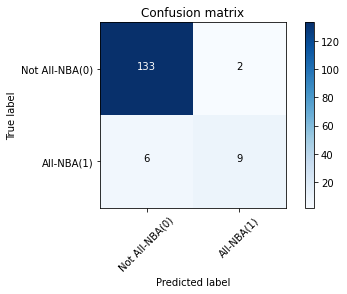

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [23]:
decTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state = 42)
decTree2.fit(X_res,y_res)
predTree2 = decTree2.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree2))

DecisionTrees's Accuracy:  0.9


In [24]:
f1_score(y_test, predTree2, average='weighted') 

0.9014270296198587

In [25]:
jaccard_score(y_test, predTree2,pos_label=0)

0.8943661971830986

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       135
           1       0.50      0.53      0.52        15

    accuracy                           0.90       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.90      0.90      0.90       150

Confusion matrix, without normalization
[[127   8]
 [  7   8]]


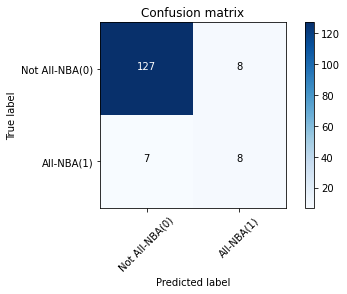

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

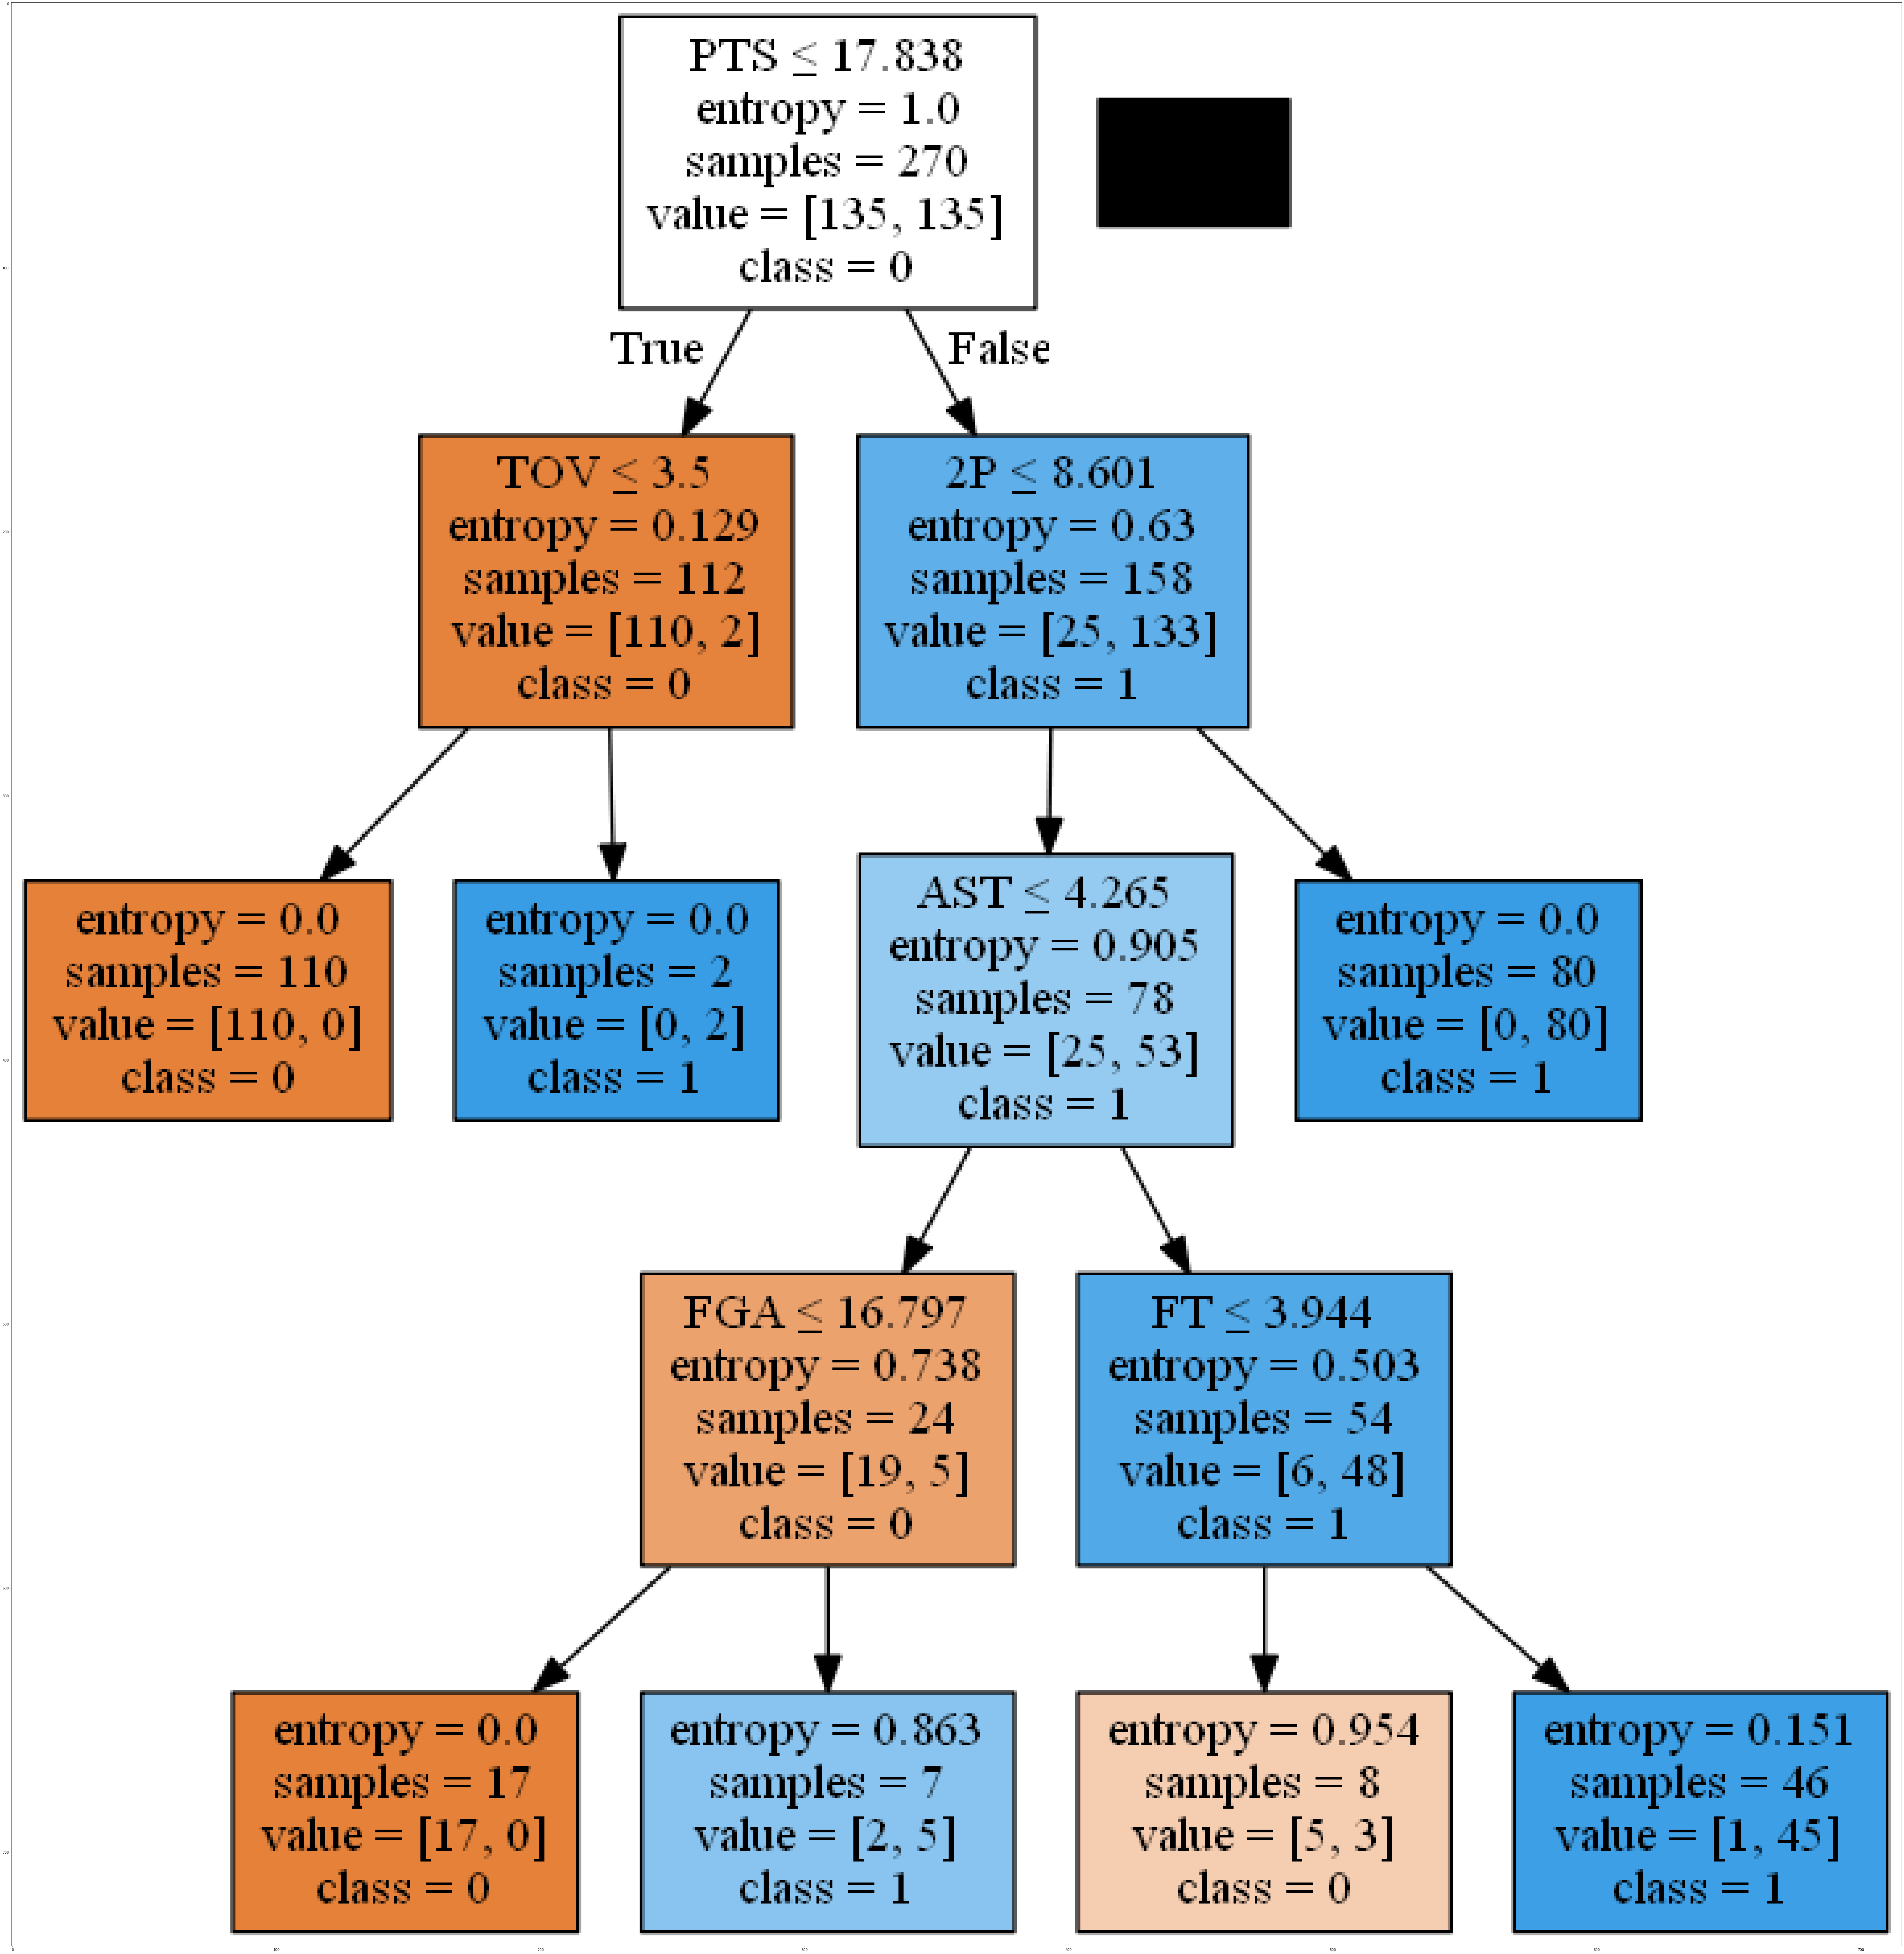

In [27]:
dot_data = StringIO()
filename = "dectree.png"
featureNames = df_test.columns[0:17]
out=tree.export_graphviz(decTree2,feature_names=featureNames, out_file=dot_data, class_names= ["0","1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [28]:
decTree3 = DecisionTreeClassifier(criterion="gini", max_depth = 4, random_state = 42)
decTree3.fit(X_res,y_res)
predTree3 = decTree3.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree3))

DecisionTrees's Accuracy:  0.9


In [29]:
f1_score(y_test, predTree3, average='weighted') 

0.908128660980372

In [30]:
jaccard_score(y_test, predTree3,pos_label=0)

0.8920863309352518

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       135
           1       0.50      0.73      0.59        15

    accuracy                           0.90       150
   macro avg       0.73      0.83      0.77       150
weighted avg       0.92      0.90      0.91       150

Confusion matrix, without normalization
[[124  11]
 [  4  11]]


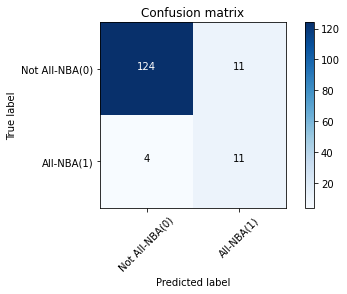

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree3, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

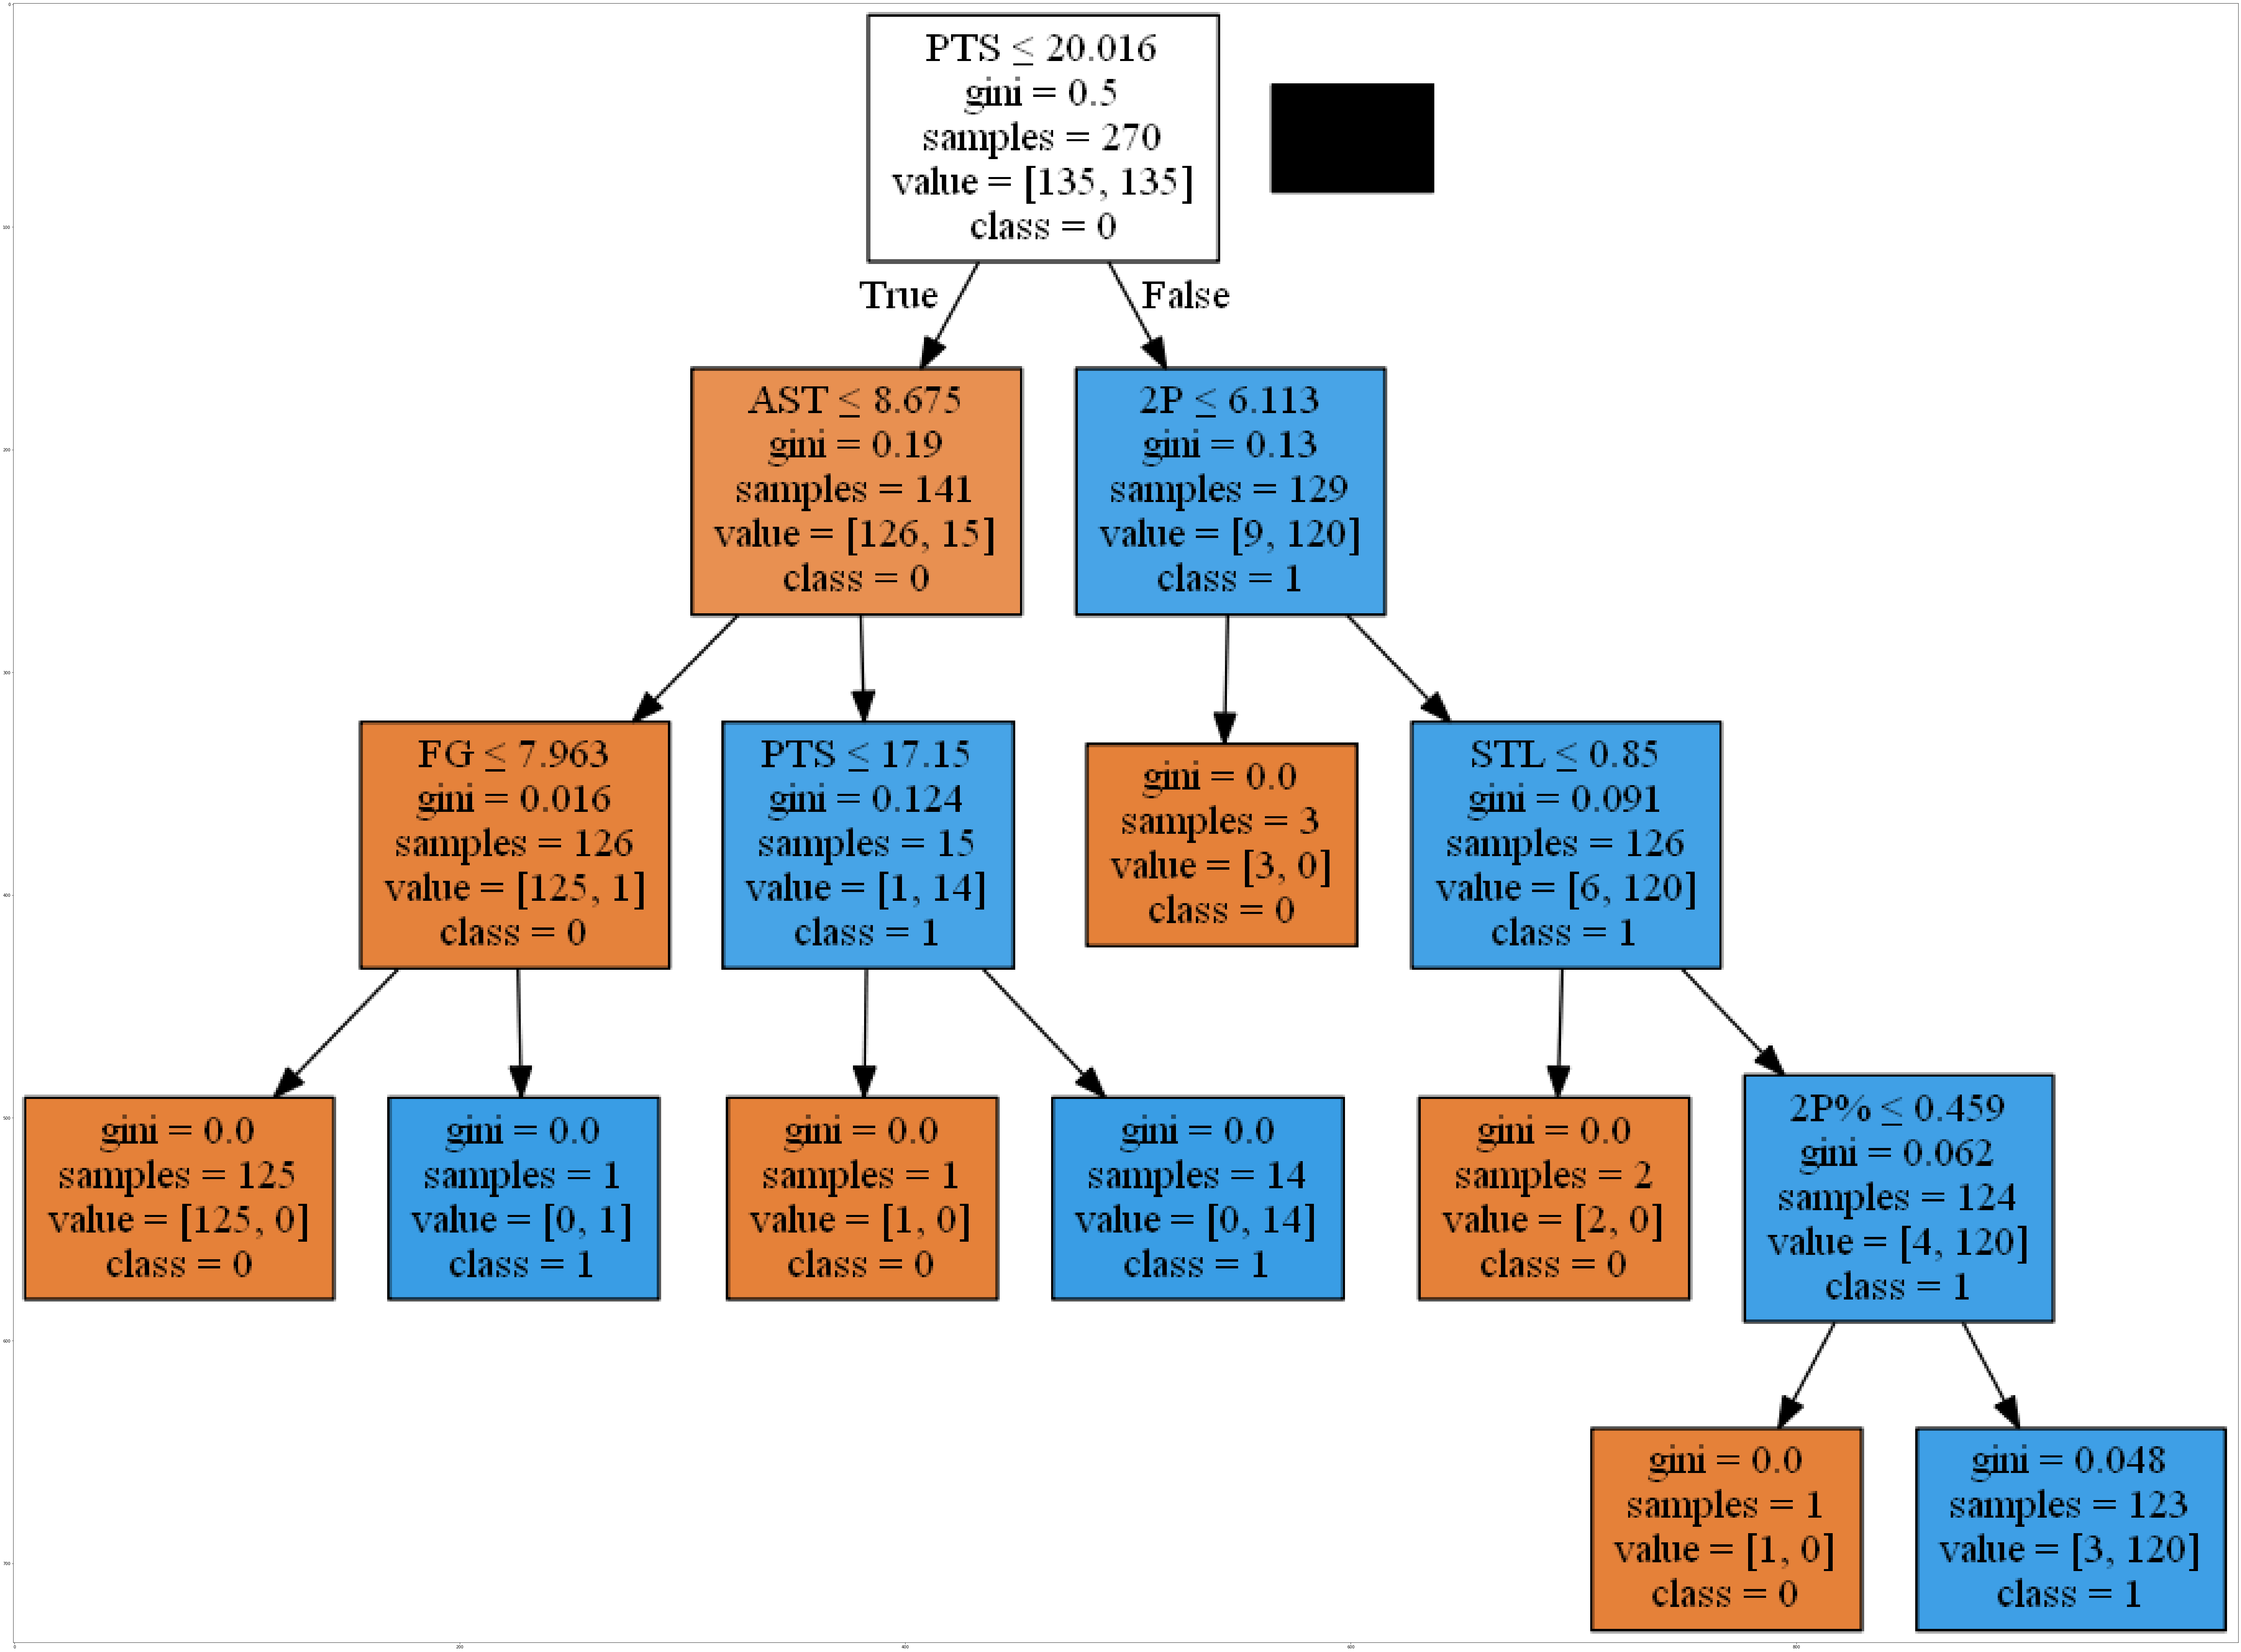

In [32]:
dot_data = StringIO()
filename = "dectree.png"
featureNames = df_test.columns[0:17]
out=tree.export_graphviz(decTree3,feature_names=featureNames, out_file=dot_data, class_names= ["0","1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [33]:
decTree4 = DecisionTreeClassifier(criterion="gini", max_depth = 4, random_state = 42)
decTree4.fit(X_res,y_res)
predTree4 = decTree4.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree4))

DecisionTrees's Accuracy:  0.9


In [34]:
f1_score(y_test, predTree4, average='weighted') 

0.908128660980372

In [35]:
jaccard_score(y_test, predTree4,pos_label=0)

0.8920863309352518

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       135
           1       0.50      0.73      0.59        15

    accuracy                           0.90       150
   macro avg       0.73      0.83      0.77       150
weighted avg       0.92      0.90      0.91       150

Confusion matrix, without normalization
[[124  11]
 [  4  11]]


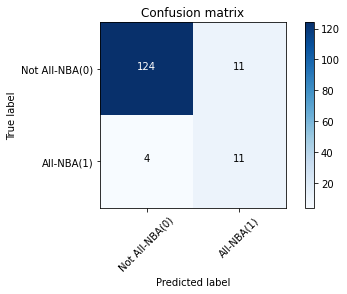

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree4, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree4))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

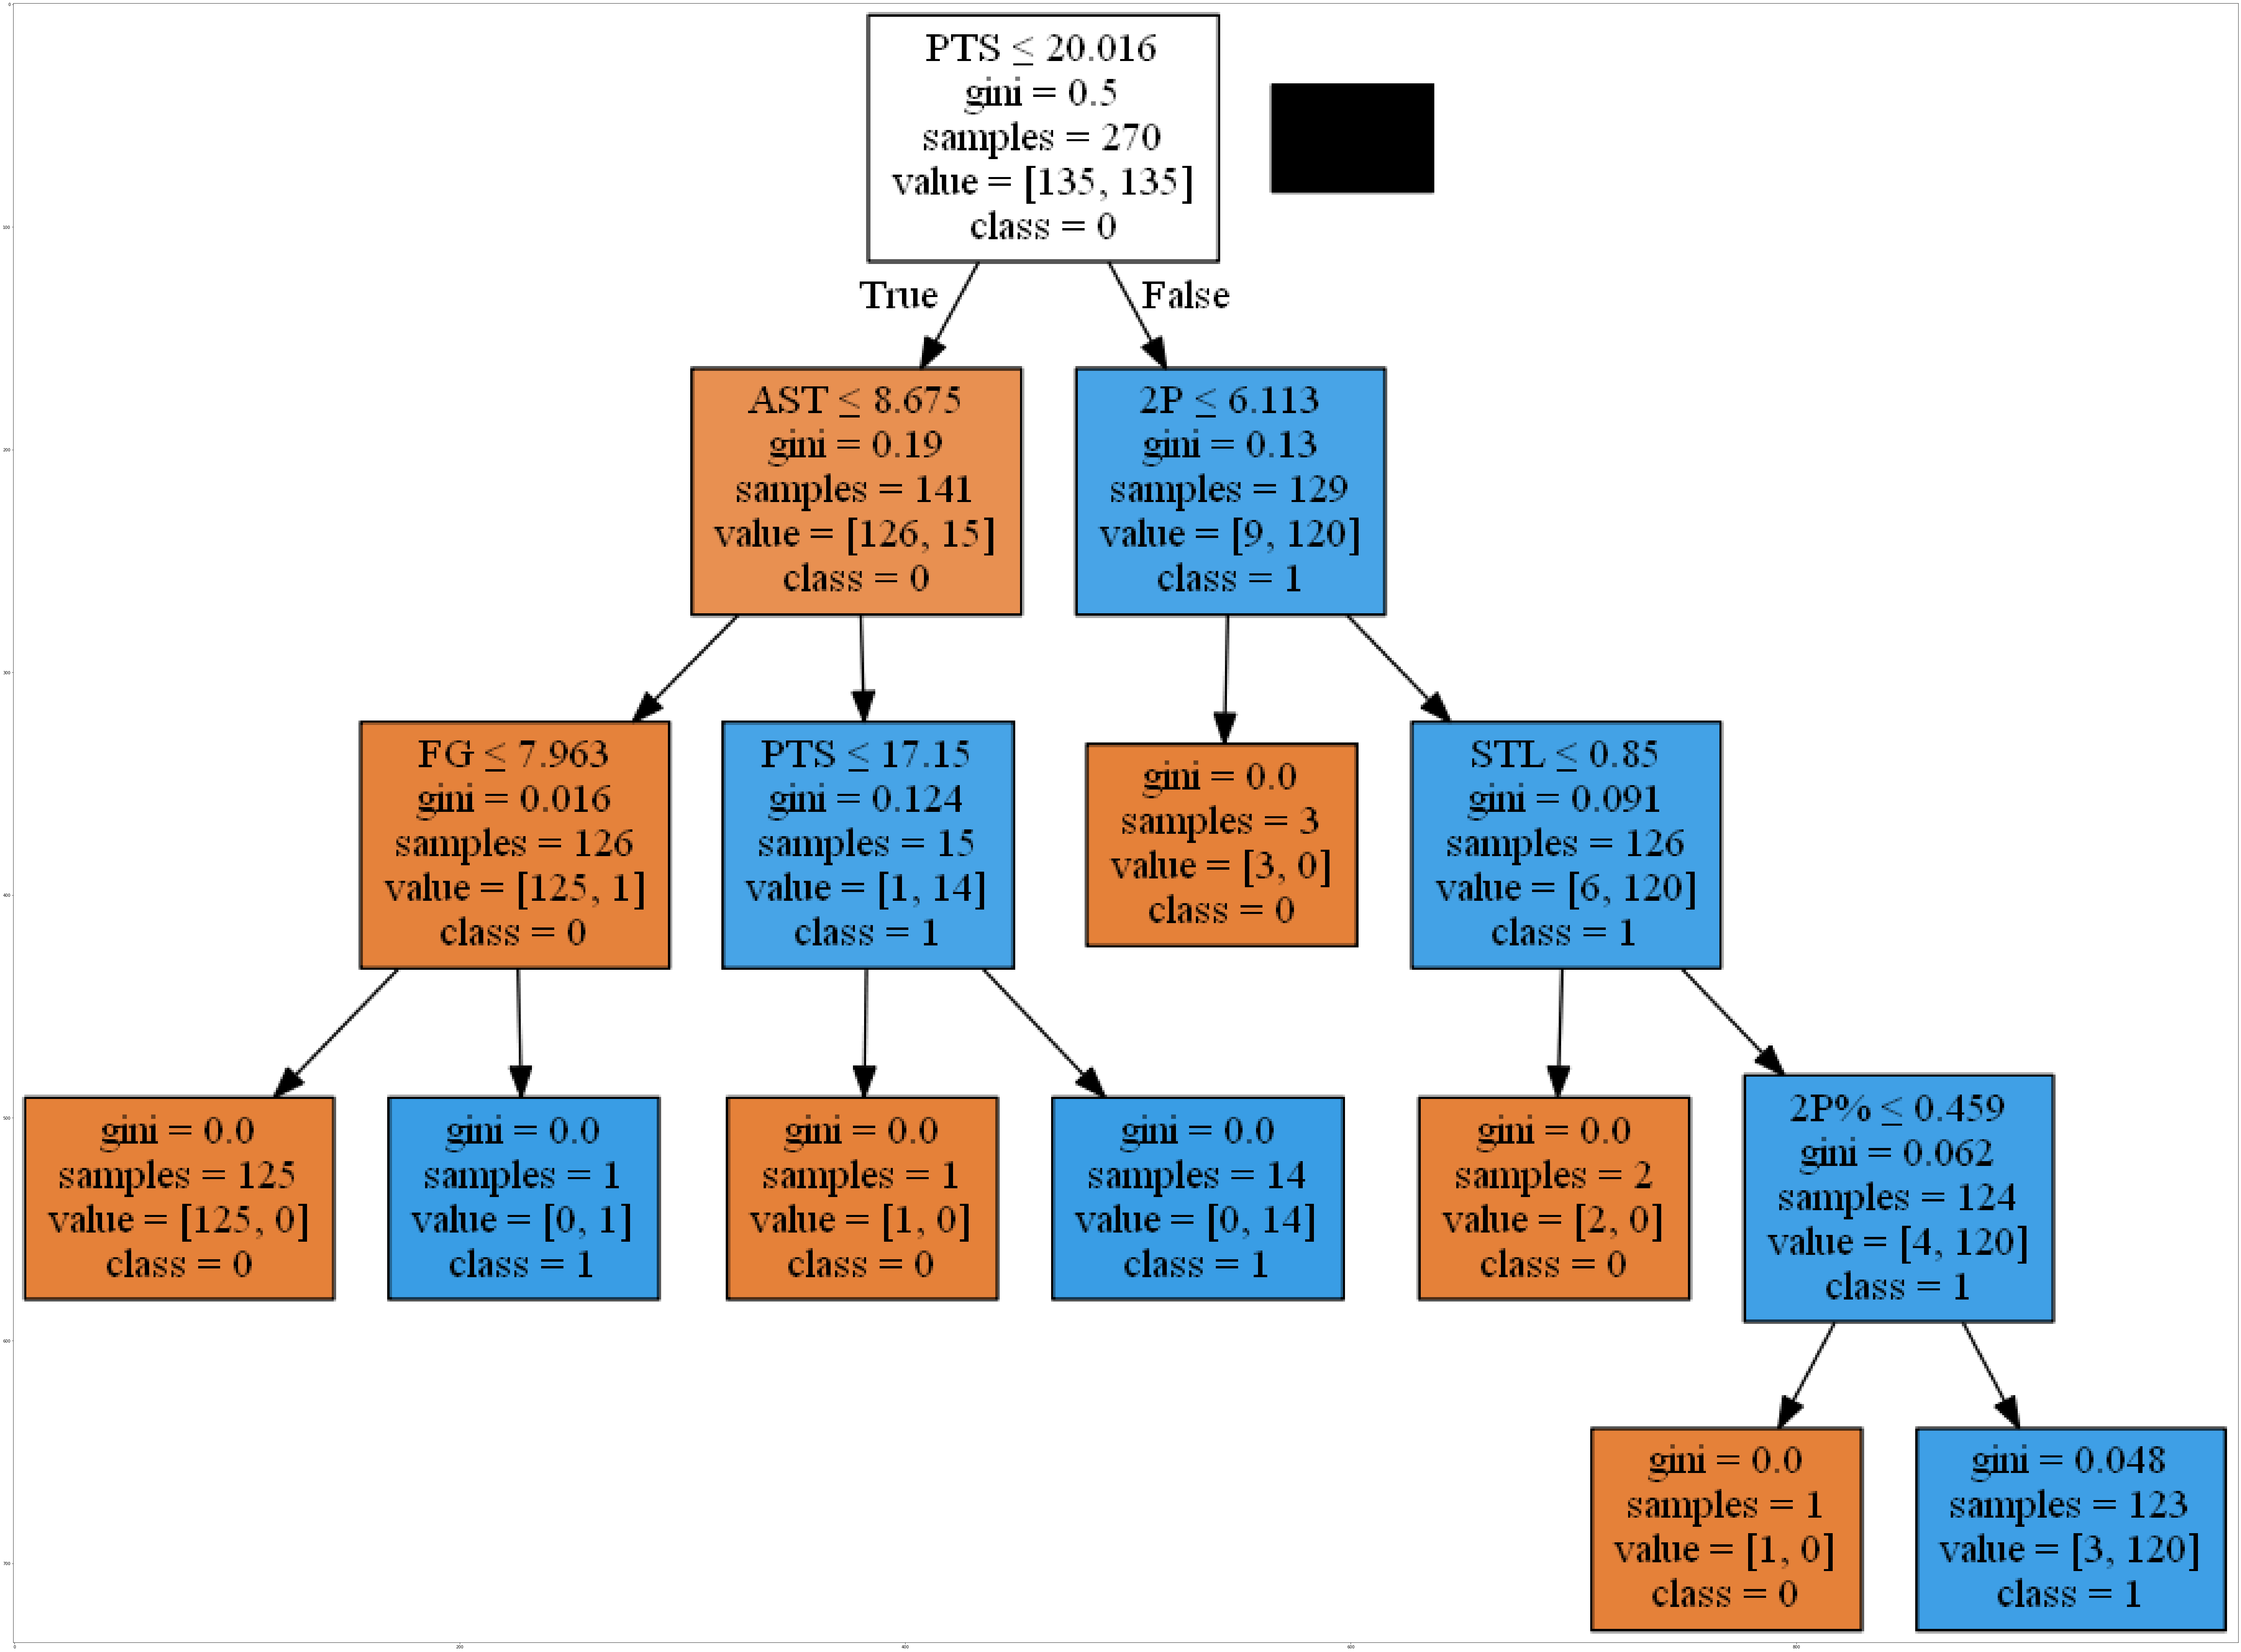

In [37]:
dot_data = StringIO()
filename = "dectree.png"
featureNames = df_test.columns[0:17]
out=tree.export_graphviz(decTree4,feature_names=featureNames, out_file=dot_data, class_names= ["0","1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [38]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [39]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.92

In [41]:
f1_score(y_test, yhat, average='weighted') 

0.8950354609929078

In [42]:
jaccard_score(y_test, yhat,pos_label=0)

0.9183673469387755

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       135
           1       1.00      0.20      0.33        15

    accuracy                           0.92       150
   macro avg       0.96      0.60      0.65       150
weighted avg       0.93      0.92      0.90       150

Confusion matrix, without normalization
[[135   0]
 [ 12   3]]


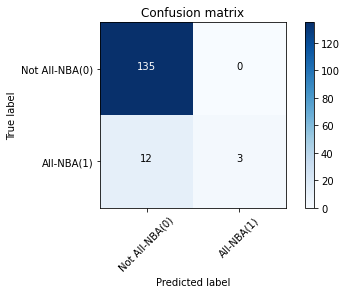

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [44]:
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_res, y_res) 

SVC()

In [45]:
yhat2 = clf2.predict(X_test)
yhat2 [0:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [46]:
accuracy_score(y_test, yhat2)

0.86

In [47]:
f1_score(y_test, yhat2, average='weighted') 

0.8792156862745097

In [48]:
jaccard_score(y_test, yhat2,pos_label=0)

0.8478260869565217

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       135
           1       0.40      0.80      0.53        15

    accuracy                           0.86       150
   macro avg       0.69      0.83      0.73       150
weighted avg       0.92      0.86      0.88       150

Confusion matrix, without normalization
[[117  18]
 [  3  12]]


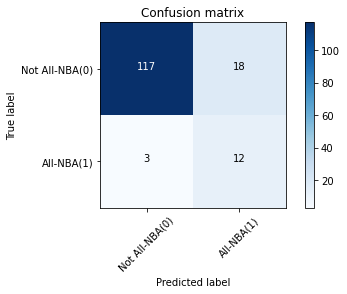

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))
#
# Create the parameter grid
#
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsSVC.best_score_)
#
# Print the model parameters of the best model
#
print(gsSVC.best_params_)

0.9466666666666667
{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [51]:
yhat3 = gsSVC.predict(X_test)
yhat3 [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [52]:
accuracy_score(y_test, yhat3)

0.9266666666666666

In [53]:
f1_score(y_test, yhat3, average='weighted') 

0.9121351766513055

In [54]:
jaccard_score(y_test, yhat3,pos_label=0)

0.9241379310344827

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       135
           1       0.83      0.33      0.48        15

    accuracy                           0.93       150
   macro avg       0.88      0.66      0.72       150
weighted avg       0.92      0.93      0.91       150

Confusion matrix, without normalization
[[134   1]
 [ 10   5]]


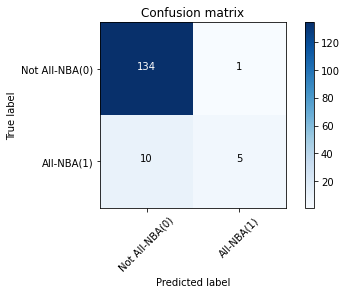

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [56]:
gsSVC2 = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC2.fit(X_res, y_res)
#
# Print the training score of the best model
#
print(gsSVC2.best_score_)
#
# Print the model parameters of the best model
#
print(gsSVC2.best_params_)

0.9888888888888889
{'svc__C': 0.5, 'svc__gamma': 0.5, 'svc__kernel': 'rbf'}


In [57]:
yhat4 = gsSVC2.predict(X_test)
yhat4 [0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [58]:
accuracy_score(y_test, yhat4)

0.9266666666666666

In [59]:
f1_score(y_test, yhat4, average='weighted') 

0.9164338408413122

In [60]:
jaccard_score(y_test, yhat4,pos_label=0)

0.9236111111111112

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       135
           1       0.75      0.40      0.52        15

    accuracy                           0.93       150
   macro avg       0.84      0.69      0.74       150
weighted avg       0.92      0.93      0.92       150

Confusion matrix, without normalization
[[133   2]
 [  9   6]]


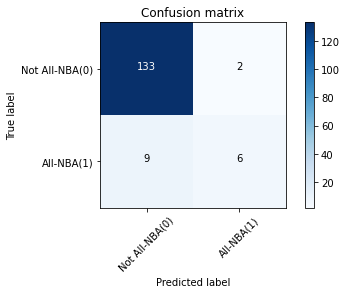

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat4))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [62]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08, random_state = 42)

In [63]:
from sklearn.metrics import accuracy_score
mlp.fit(X_train, y_train)
predANN = mlp.predict(X_test)
acc_val = accuracy_score(y_test, predANN)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9


In [64]:
f1_score(y_test, predANN, average='weighted') 

0.8526315789473685

In [65]:
jaccard_score(y_test, predANN,pos_label=0)

0.9

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       135
           1       0.00      0.00      0.00        15

    accuracy                           0.90       150
   macro avg       0.45      0.50      0.47       150
weighted avg       0.81      0.90      0.85       150

Confusion matrix, without normalization
[[135   0]
 [ 15   0]]


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


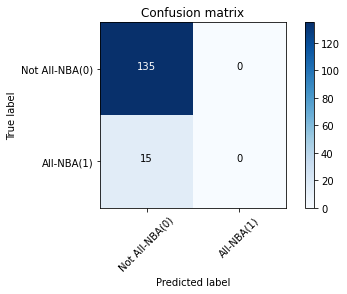

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [67]:
mlp.fit(X_res, y_res)
predANN2 = mlp.predict(X_test)
acc_val = accuracy_score(y_test, predANN2)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.94


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
f1_score(y_test, predANN2, average='weighted') 

0.9390762183483903

In [69]:
jaccard_score(y_test, predANN2,pos_label=0)

0.9357142857142857

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       135
           1       0.71      0.67      0.69        15

    accuracy                           0.94       150
   macro avg       0.84      0.82      0.83       150
weighted avg       0.94      0.94      0.94       150

Confusion matrix, without normalization
[[131   4]
 [  5  10]]


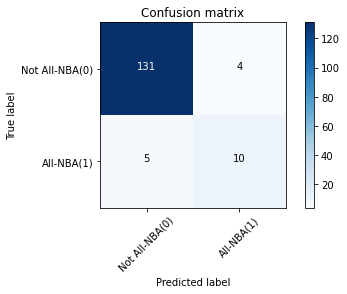

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
predLR = LR.predict(X_test)
accuracy_score(y_test, predLR)

0.9133333333333333

In [72]:
f1_score(y_test, predLR, average='weighted') 

0.8821866555809602

In [73]:
jaccard_score(y_test, predLR,pos_label=0)

0.9121621621621622

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       1.00      0.13      0.24        15

    accuracy                           0.91       150
   macro avg       0.96      0.57      0.59       150
weighted avg       0.92      0.91      0.88       150

Confusion matrix, without normalization
[[135   0]
 [ 13   2]]


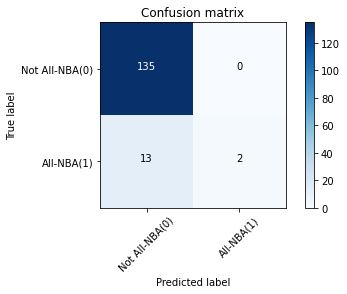

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [75]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_res,y_res)
predLR2 = LR.predict(X_test)
accuracy_score(y_test, predLR2)

0.9266666666666666

In [76]:
f1_score(y_test, predLR2, average='weighted') 

0.9326276847189395

In [77]:
jaccard_score(y_test, predLR,pos_label=0)

0.9121621621621622

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       135
           1       0.59      0.87      0.70        15

    accuracy                           0.93       150
   macro avg       0.79      0.90      0.83       150
weighted avg       0.95      0.93      0.93       150

Confusion matrix, without normalization
[[126   9]
 [  2  13]]


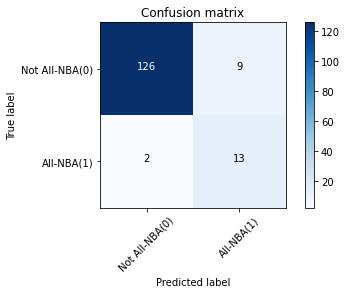

In [78]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [79]:
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsLR.best_score_)
#
# Print the model parameters of the best model
#
print(gsLR.best_params_)

0.9333333333333333
{'logisticregression__C': 0.05}


In [80]:
predgsLR = gsLR.predict(X_test)
accuracy_score(y_test, predgsLR)

0.9333333333333333

In [81]:
f1_score(y_test, predgsLR, average='weighted') 

0.9178571428571429

In [82]:
jaccard_score(y_test, predgsLR,pos_label=0)

0.9310344827586207

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       135
           1       1.00      0.33      0.50        15

    accuracy                           0.93       150
   macro avg       0.97      0.67      0.73       150
weighted avg       0.94      0.93      0.92       150

Confusion matrix, without normalization
[[135   0]
 [ 10   5]]


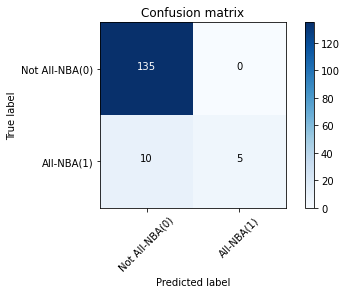

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predgsLR, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predgsLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [84]:
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR2 = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR2 = gsLR2.fit(X_res, y_res)
#
# Print the training score of the best model
#
print(gsLR2.best_score_)
#
# Print the model parameters of the best model
#
print(gsLR2.best_params_)

0.962962962962963
{'logisticregression__C': 10.0}


In [85]:
predgsLR2 = gsLR2.predict(X_test)
accuracy_score(y_test, predgsLR2)

0.9533333333333334

In [86]:
f1_score(y_test, predgsLR2, average='weighted') 

0.9526148364931925

In [87]:
jaccard_score(y_test, predgsLR2,pos_label=0)

0.9496402877697842

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       135
           1       0.79      0.73      0.76        15

    accuracy                           0.95       150
   macro avg       0.88      0.86      0.87       150
weighted avg       0.95      0.95      0.95       150

Confusion matrix, without normalization
[[132   3]
 [  4  11]]


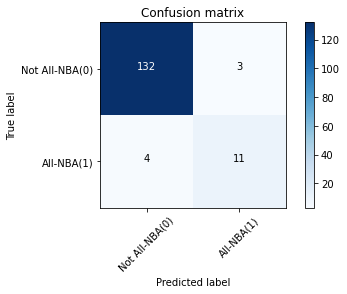

In [88]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predgsLR2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predgsLR2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')